
### Advanced Machine Learning

# Introduction to Supervised Learning

01/03/21

Jonathan Schler

(credit: Columbia Univ - 4995 - Machine Learning Course)






# Supervised Learning

<center>

$$ (x_i, y_i) \propto p(x, y) \text{ i.i.d.}$$
$$ x_i \in \mathbb{R}^p$$
$$ y_i \in \mathbb{R}$$
$$\text{learn }f(x_i) \approx y_i$$
such that
$$f(x) \approx y \quad$$
for new $(x, y) \propto p(x, y)$.
</center>




# Nearest Neighbors
<center>
<img src="images/knn_boundary_test_points.png" style="width: 600px;">
$$f(x) = y_i, i = \text{argmin}_j || x_j - x||$$
</center>



# Nearest Neighbors

<center>
<img src="images/knn_boundary_k1.png" style="width: 600px;">

$$f(x) = y_i, i = \text{argmin}_j || x_j - x||$$
</center>

<center>
<img src="images/train_test_set_2d_classification.png" style="width: 600px;">
</center>



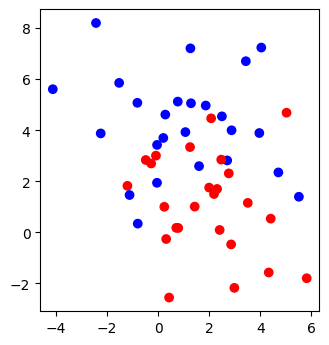

In [114]:
# Imports and Data creation

from sklearn.datasets import make_blobs
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors

%matplotlib inline
plt.rcParams['image.cmap'] = "bwr"
plt.rcParams['figure.dpi'] = "100"
plt.rcParams['savefig.bbox'] = "tight"


X, y = make_blobs(centers=2, cluster_std=2, random_state=0, n_samples=50)
plt.figure()
plt.gca().set_aspect("equal")
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.show()


In [147]:
# actual classification (and it's imports as well)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y)

knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
print(f"accuracy: {knn.score(X_test, y_test):.2f}")
#y_pred=knn.predict(X_test)
#print(np.sum(y_pred==y_test)/len(y_pred))

accuracy: 0.54





# Influence of Number of Neighbors

<center>
<img src="images/knn_boundary_k1.png" style="width: 600px;">
</center>



# Influence of Number of Neighbors

<center>
<img src="images/knn_boundary_k3.png" style="width: 600px;">
</center>




# Influence of n_neighbors

<center>
<img src="images/knn_boundary_varying_k.png" style="width: 600px;">
</center>




# Model complexity

<center>
<img src="images/knn_model_complexity.png" style="width: 600px;">
</center>


# Overfitting and Underfitting

<center>
<img src="images/overfitting_underfitting_cartoon_train.png" style="width: 600px;">
</center>



# Overfitting and Underfitting

<center>
<img src="images/overfitting_underfitting_cartoon_generalization.png" style="width: 600px;">
</center>


# Overfitting and Underfitting

<center>
<img src="images/overfitting_underfitting_cartoon_full.png" style="width: 600px;">
</center>




# Computational Properties

## Naive
- fit: no time
- memory: O(n * p)
- predict: O(n * p)


n=num_samples
p=num_features



# Computational Properties

## Naive
- fit: no time
- memory: O(n * p)
- predict: O(n * p)

## Kd-tree
- fit: O(p * n log n)
- memory: O(n * p)
- predict: O(k * log(n)) (FOR FIXED p!)


n=num_samples
p=num_features





# So far: Train-test-split

<center>
<img src="images/train_test_split_new.png" style="width: 600px;">
</center>




# Threefold split
<center>
<img src="images/train_test_validation_split.png" style="width: 600px;">
</center>

Interesting related read on overfitting in cross-validation
[Preventing Overfitting in cross-validation - Ng 1997](http://robotics.stanford.edu/~ang/papers/cv-final.pdf)

http://robotics.stanford.edu/~ang/papers/cv-final.pdf



# Overfitting the validation set

<center>
<img src="images/overfitting_validation_set_1.png" style="width: 600px;">
</center>


# Overfitting the validation set

<center>
<img src="images/overfitting_validation_set_2.png" style="width: 600px;">
</center>



# Overfitting the validation set

<center>
<img src="images/overfitting_validation_set_3.png" style="width: 600px;">
</center>



# Overfitting the validation set

<center>
<img src="images/overfitting_validation_set_4.png" style="width: 600px;">
</center>

In [148]:
rng = np.random.RandomState(42)
X_trainval, X_test, y_trainval, y_test = train_test_split(X, y)
X_train, X_val, y_train, y_val = train_test_split(X_trainval, y_trainval)

val_scores = []
neighbors = np.arange(1, 15, 2)
for i in neighbors:
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    val_scores.append(knn.score(X_val, y_val))
print(f"best validation score: {np.max(val_scores):.3}")
best_n_neighbors = neighbors[np.argmax(val_scores)]
print("best n_neighbors:", best_n_neighbors)

knn = KNeighborsClassifier(n_neighbors=best_n_neighbors)
knn.fit(X_trainval, y_trainval)
print(f"test-set score: {knn.score(X_test, y_test):.3f}")


best validation score: 0.9
best n_neighbors: 3
test-set score: 0.692



# Cross-validation

<center>
<img src="images/cross_validation_new.png" style="width: 600px;">
</center>



pro: more stable, more data

con: slower



# Cross-validation + test set

<center>
<img src="images/grid_search_cross_validation_new.png" style="width: 600px;">
</center>

In [150]:
from sklearn.model_selection import cross_val_score

X_train, X_test, y_train, y_test = train_test_split(X, y)

cross_val_scores = []
neighbors = np.arange(1, 15, 2)

for i in neighbors:
    knn = KNeighborsClassifier(n_neighbors=i)
    scores = cross_val_score(knn, X_train, y_train, cv=10)
    cross_val_scores.append(np.mean(scores))
    
print(f"best cross-validation score: {np.max(cross_val_scores):.3}")
best_n_neighbors = neighbors[np.argmax(cross_val_scores)]
print(f"best n_neighbors: {best_n_neighbors}")

knn = KNeighborsClassifier(n_neighbors=best_n_neighbors)
knn.fit(X_train, y_train)
print(f"test-set score: {knn.score(X_test, y_test):.3f}")
print(neighbors)
print(cross_val_scores)

best cross-validation score: 0.842
best n_neighbors: 3
test-set score: 0.615
[ 1  3  5  7  9 11 13]
[0.7833333333333333, 0.8416666666666666, 0.8166666666666668, 0.7916666666666667, 0.7666666666666667, 0.7666666666666667, 0.7083333333333333]



<center>
<img src="images/gridsearch_workflow.png" style="width: 600px;">
</center>

In [160]:
from sklearn.model_selection import GridSearchCV

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=15)


param_grid = {'n_neighbors':  np.arange(1, 30, 2)}
grid = GridSearchCV(KNeighborsClassifier(), param_grid=param_grid, cv=10,
                   return_train_score=True)
grid.fit(X_train, y_train)
print(f"best mean cross-validation score: {grid.best_score_}")
print(f"best parameters: {grid.best_params_}")
print(f"test-set score: {grid.score(X_test, y_test):.3f}")
#grid.cv_results_

best mean cross-validation score: 0.7833333333333333
best parameters: {'n_neighbors': 17}
test-set score: 0.769


In [161]:
import pandas as pd
results = pd.DataFrame(grid.cv_results_)
results.columns


Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_n_neighbors', 'params', 'split0_test_score', 'split1_test_score',
       'split2_test_score', 'split3_test_score', 'split4_test_score',
       'split5_test_score', 'split6_test_score', 'split7_test_score',
       'split8_test_score', 'split9_test_score', 'mean_test_score',
       'std_test_score', 'rank_test_score', 'split0_train_score',
       'split1_train_score', 'split2_train_score', 'split3_train_score',
       'split4_train_score', 'split5_train_score', 'split6_train_score',
       'split7_train_score', 'split8_train_score', 'split9_train_score',
       'mean_train_score', 'std_train_score'],
      dtype='object')

In [157]:
results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.001134,0.000713,0.002659,0.002474,1,{'n_neighbors': 1},1.00,0.50,0.50,0.75,0.25,0.75,0.75,0.333333,1.000000,1.000000,0.683333,0.262996,14
1,0.001097,0.000593,0.002009,0.000923,3,{'n_neighbors': 3},1.00,0.75,0.75,0.75,0.75,0.75,0.50,0.333333,0.666667,0.666667,0.691667,0.166875,10
2,0.001129,0.000845,0.001683,0.000529,5,{'n_neighbors': 5},1.00,0.75,0.50,0.75,0.75,0.75,0.50,0.333333,0.666667,0.666667,0.666667,0.174801,15
3,0.001072,0.000972,0.002142,0.001232,7,{'n_neighbors': 7},1.00,0.75,0.50,0.75,0.75,1.00,0.50,0.333333,0.666667,0.666667,0.691667,0.200866,10
4,0.000970,0.000780,0.001918,0.001221,9,{'n_neighbors': 9},1.00,0.75,0.50,0.75,0.75,1.00,0.50,0.333333,0.666667,0.666667,0.691667,0.200866,10
5,0.000425,0.000119,0.000817,0.000153,11,{'n_neighbors': 11},1.00,0.75,0.75,0.75,0.75,1.00,0.50,0.333333,0.666667,0.666667,0.716667,0.190759,8
6,0.000713,0.000787,0.002040,0.001706,13,{'n_neighbors': 13},1.00,0.50,0.75,0.75,0.75,1.00,0.50,0.333333,0.666667,0.666667,0.691667,0.200866,10
7,0.000744,0.000356,0.001878,0.001128,15,{'n_neighbors': 15},0.75,0.75,1.00,0.75,0.75,1.00,0.50,0.333333,1.000000,0.666667,0.750000,0.207498,6
8,0.000360,0.000101,0.001281,0.001054,17,{'n_neighbors': 17},0.75,0.75,1.00,0.75,0.75,1.00,0.50,0.333333,1.000000,1.000000,0.783333,0.217945,1
9,0.000424,0.000153,0.001163,0.000513,19,{'n_neighbors': 19},1.00,0.75,1.00,0.75,0.75,1.00,0.50,0.333333,1.000000,0.666667,0.775000,0.220637,3


In [158]:
results.params

0      {'n_neighbors': 1}
1      {'n_neighbors': 3}
2      {'n_neighbors': 5}
3      {'n_neighbors': 7}
4      {'n_neighbors': 9}
5     {'n_neighbors': 11}
6     {'n_neighbors': 13}
7     {'n_neighbors': 15}
8     {'n_neighbors': 17}
9     {'n_neighbors': 19}
10    {'n_neighbors': 21}
11    {'n_neighbors': 23}
12    {'n_neighbors': 25}
13    {'n_neighbors': 27}
14    {'n_neighbors': 29}
Name: params, dtype: object

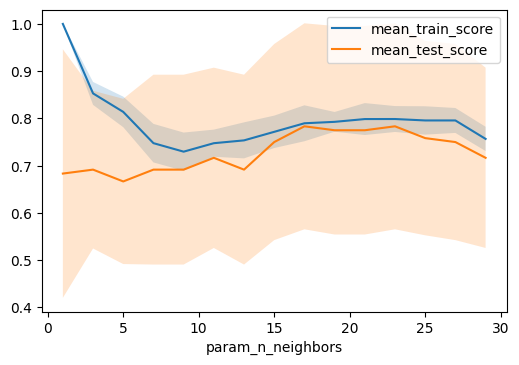

In [164]:
import pandas as pd
results = pd.DataFrame(grid.cv_results_)
results.columns

results.plot('param_n_neighbors', 'mean_train_score')
results.plot('param_n_neighbors', 'mean_test_score', ax=plt.gca())
plt.fill_between(results.param_n_neighbors.astype(np.int),
                   results['mean_train_score'] + results['std_train_score'],
                   results['mean_train_score'] - results['std_train_score'], alpha=0.2)
plt.fill_between(results.param_n_neighbors.astype(np.int),
                   results['mean_test_score'] + results['std_test_score'],
                   results['mean_test_score'] - results['std_test_score'], alpha=0.2)
plt.legend()


# Nested Cross-Validation

- Replace outer split by CV loop
- Doesn’t yield single model
(inner loop might have different best parameter settings)
- Takes a long time, not that useful in practice


# Cross-Validation Strategies



![:scale 90%](images/kfold_cv.png)



<center>
<img src="images/stratified_cv.png" style="width: 600px;">
</center>


Stratified:
Ensure relative class frequencies in each fold reflect relative class
frequencies on the whole dataset.



# Importance of Stratification

In [168]:
rng = np.random.RandomState(0)
X = rng.normal(size=(100, 2))
y = np.zeros(100, int)
y[:40] = 1
y = pd.Series(y)

y.value_counts()


0    60
1    40
dtype: int64

In [169]:
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import cross_val_score, KFold, StratifiedKFold

dc = DummyClassifier('most_frequent')
skf = StratifiedKFold(n_splits=5, shuffle=True)
res = cross_val_score(dc, X, y, cv=skf)
np.mean(res), res.std()

/Users/jonathan.schler/anaconda3/envs/python37/lib/python3.7/site-packages/sklearn/utils/validation.py:71: FutureWarning: Pass strategy=most_frequent as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


(0.6, 0.0)

In [171]:
kf = KFold(n_splits=5, shuffle=True)
res = cross_val_score(dc, X, y, cv=kf)
np.mean(res), res.std()

(0.6, 0.12247448713915889)



# Repeated KFold and LeaveOneOut

- LeaveOneOut : KFold(n_folds=n_samples) <br>
High variance, takes a long time <br>
(see [Raschka](https://arxiv.org/pdf/1811.12808.pdf) for a review and [Varoquaux](https://hal.inria.fr/hal-01545002/file/paper.pdf) for empirical evaluation)

- Better: ShuffleSplit (aka Monte Carlo) <br>
Repeatedly sample a test set with replacement

- Even Better: RepeatedKFold. <br>
Apply KFold or StratifiedKFold multiple times with shuffled data.


<center>
<img src="images/shuffle_split_cv.png" style="width: 600px;">
</center>

Number of iterations and test set size independent

<center>
<img src="images/repeated_stratified_kfold.png" style="width: 600px;">
</center>


Potentially less variance than StratifiedShuffleSplit.<br>
Five times five fold or at most ten times ten fold is sufficient.



# Defaults in scikit-learn

- 5-fold in 0.22 (used to be 3 fold)
- For classification cross-validation is stratified
- train_test_split has stratify option:
train_test_split(X, y, stratify=y)

- No shuffle by default!



# Cross-Validation with non-iid data



# Grouped Data
### Assume have data (medical, product, user...) from 5 cities
- Tel Aviv, Jerusalem, Eilat, Kiryat Shmona, Yericho.

We can assume data within a city is more correlated then between cities.

### Usage Scenarios
- Assume all future users will be in one of these cities: i.i.d.
- Assume we want to generalize to predict for a new city: not i.i.d.


<center>
<img src="images/group_kfold.png" style="width: 600px;">
</center>



# Correlations in time (and/or space)

<center>
<img src="images/time_series1.png" style="width: 600px;">
</center>


# Correlations in time (and/or space)

<center>
<img src="images/time_series2.png" style="width: 600px;">
</center>


# Correlations in time (and/or space)

<center>
<img src="images/time_series3.png" style="width: 600px;">
</center>


<center>
<img src="images/time_series_walk_forward_cv.png" style="width: 600px;">
</center>


<center>
<img src="images/time_series_cv.png" style="width: 600px;">
</center>


# Using Cross-Validation Generators

In [ ]:
from sklearn.model_selection import KFold, StratifiedKFold, ShuffleSplit, RepeatedStratifiedKFold

X, y = make_blobs(centers=2, cluster_std=2, random_state=0, n_samples=50)

kfold = KFold(n_splits=5)
skfold = StratifiedKFold(n_splits=5, shuffle=True)
ss = ShuffleSplit(n_splits=20, train_size=.4, test_size=.3)
rs = RepeatedStratifiedKFold(n_splits=5, n_repeats=10)

print("KFold:")
print(cross_val_score(KNeighborsClassifier(), X, y, cv=kfold))

print("StratifiedKFold:")
print(cross_val_score(KNeighborsClassifier(), X, y, cv=skfold))

print("ShuffleSplit:")
print(cross_val_score(KNeighborsClassifier(), X, y, cv=ss))

print("RepeatedStratifiedKFold:")
print(cross_val_score(KNeighborsClassifier(), X, y, cv=rs))


# cross_validate function

In [172]:
from sklearn.model_selection import cross_validate
res = cross_validate(KNeighborsClassifier(), X, y, return_train_score=True,
                     scoring=["accuracy", "roc_auc"])
res_df = pd.DataFrame(res)
res_df

,fit_time,score_time,test_accuracy,train_accuracy,test_roc_auc,train_roc_auc
0,0.000942,0.007009,0.65,0.7750,0.614583,0.788411
1,0.001650,0.036768,0.65,0.6500,0.770833,0.670247
2,0.001591,0.009427,0.55,0.7000,0.473958,0.754883
3,0.001003,0.003331,0.45,0.7375,0.458333,0.805339
4,0.000944,0.008440,0.55,0.7125,0.598958,0.771484






# Questions ?

    